In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets

In [2]:
def get_iris_data():
    ds = sklearn.datasets.load_iris()
    df = pd.DataFrame(ds['data'], columns = ds['feature_names'])
    code_species_map = dict(zip(range(3), ds['target_names']))
    df['species'] = [code_species_map[c] for c in ds['target']]
    return df 

In [3]:
df = get_iris_data()

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
from matplotlib import pyplot as plt
import sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


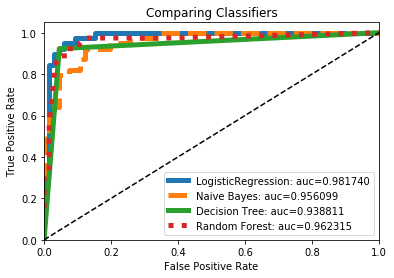

In [6]:
CLFR_MAP = {
    'LogisticRegression': ('-', LogisticRegression()),
    'Naive Bayes': ('--', GaussianNB()),
    'Decision Tree': ('.-', DecisionTreeClassifier(max_depth=5)),
    'Random Forest': (':', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)),
}
# Divide cols by independent/dependent, rows by test/train
X, Y = df[df.columns[:3]], (df['species']=='virginica')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.7)
for name, (line_fmt, model) in CLFR_MAP.items():
    model.fit(X_train, Y_train)
    # array w one col per label
    preds = model.predict_proba(X_test)
    pred = pd.Series(preds[:,1])
    fpr, tpr, thresholds = roc_curve(Y_test, pred)
    auc_score = auc(fpr, tpr)
    label='%s: auc=%f' % (name, auc_score)
    plt.plot(fpr, tpr, line_fmt, linewidth=5, label=label)
    
plt.legend(loc="lower right")
plt.title('Comparing Classifiers')
plt.plot([0, 1], [0, 1], 'k--') #x=y line. Visual aid
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()